In [1]:
import glob

root = glob.glob('./result/*')
print(len(root))

12


In [2]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
       a = 1.0*np.array(data)
       n = len(a)
       m, se = np.mean(a), scipy.stats.sem(a)
       h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
       return m, m-h, m+h

In [3]:
import cv2
import numpy as np

size = 144
x = []
y = []
err = []
y_0 = []
err_0 = []
dsc_0_num = []

for fold in root:
    gt_list = sorted(glob.glob(fold+'/GT*.jpg'))
    seg_list = sorted(glob.glob(fold+'/SEG*.jpg'))

    DSC_list = []
    DSC_wo_0_list = []

    for i in range(len(gt_list)):
        
        GT = cv2.imread(gt_list[i], 0) / 255

        GT[GT > 0.5] = 1
        GT[GT <= 0.5] = 0

        AUTO = cv2.imread(seg_list[i], 0) / 255

        AUTO[AUTO > 0.5] = 1
        AUTO[AUTO <= 0.5] = 0

        A_Intersect_G = np.multiply(AUTO, GT)
                
        DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        if DSC > 0:
            DSC_list.append(DSC)
            DSC_wo_0_list.append(DSC)
        else:
            DSC_list.append(DSC)

    m, nh, ph = mean_confidence_interval(DSC_list, confidence=0.95)
    m_0, nh_0, ph_0 = mean_confidence_interval(DSC_wo_0_list, confidence=0.95)

    x.append(size)
    y.append(m)
    err.append(m-nh)
    
    y_0.append(m_0)
    err_0.append(m_0-nh_0)
    dsc_0_num.append(len(DSC_list) - len(DSC_wo_0_list))

    size = size + 16


    #print(m, nh, ph)
    #print(m_0, nh_0, ph_0)
    #print("----------------------------")

In [4]:
import pandas as pd
data = {"mean": y, "err": err,"mean_0": y_0, "err_0": err_0, "dsc 0": dsc_0_num}
df = pd.DataFrame(data, index=x)
df.columns.name = 'crop size'
df.to_excel("table.xlsx")
print(df)

crop size      mean       err    mean_0     err_0  dsc 0
144        0.743138  0.009517  0.752137  0.008924     24
160        0.735835  0.009593  0.747764  0.008811     32
176        0.730439  0.010041  0.745680  0.009101     41
192        0.741499  0.009647  0.751615  0.008991     27
208        0.722206  0.010180  0.733913  0.009502     32
224        0.685039  0.012020  0.716096  0.010644     87
240        0.655476  0.012780  0.697922  0.011166    122
256        0.595714  0.014219  0.681689  0.011667    253
272        0.548957  0.015257  0.665382  0.012725    351
288        0.499045  0.016101  0.667835  0.013228    507
304        0.490486  0.016066  0.661234  0.013313    518
320        0.475137  0.016634  0.669800  0.014049    583


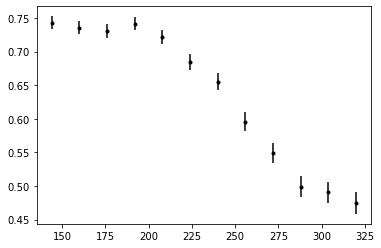

In [5]:
import matplotlib.pyplot as plt
plt.errorbar(x, y, yerr=err, fmt='.k')
plt.show()

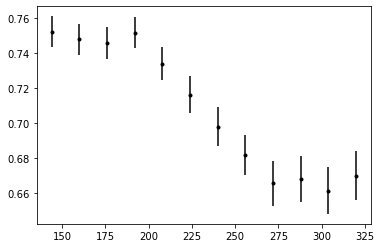

In [6]:
plt.errorbar(x, y_0, yerr=err_0, fmt='.k')
plt.show()

In [7]:
print(err)
print(err_0)

[0.009516934108760977, 0.009592623857185734, 0.010041212831876534, 0.00964667236896144, 0.010180332083001842, 0.012020354060336969, 0.01278039342372228, 0.01421866969357477, 0.015257275623713817, 0.01610066919348707, 0.01606599727088759, 0.01663368792673159]
[0.008924127647116253, 0.008811391249567535, 0.009100826738937084, 0.008990658303149823, 0.009501561229279809, 0.010644249071062872, 0.011166261560847435, 0.011667001122130594, 0.012725382463914525, 0.013227894051099254, 0.01331309378093326, 0.01404943801977998]
